## Part 1

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('toluca.csv')
df

,lotSize,workHours
0,80,399
1,30,121
2,50,221
3,90,376
4,70,361
5,60,224
6,120,546
7,80,352
8,100,353
9,50,157


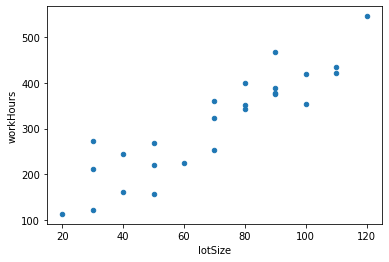

In [3]:
df.plot(kind="scatter", x="lotSize", y="workHours")

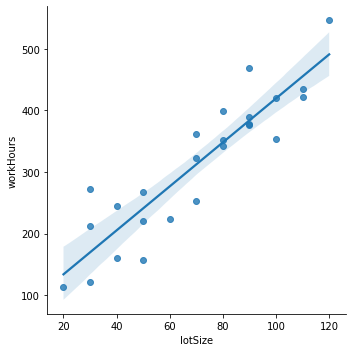

In [4]:
plt = sns.lmplot(x='lotSize', y='workHours', data=df)

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Lot Size')]

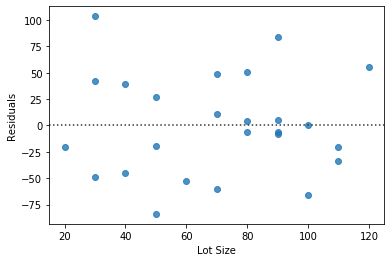

In [5]:
r1 = sns.residplot('lotSize', 'workHours', data=df)
r1.set(xlabel='Lot Size', ylabel='Residuals')

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df.drop('workHours', axis=1), df.iloc[:,1])
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
lin_reg.coef_

array([3.57020202])

In [8]:
corr_matrix = df.corr()
corr_matrix

,lotSize,workHours
lotSize,1.000000,0.906385
workHours,0.906385,1.000000


## Part 2

In [9]:
df = pd.read_csv('Credit.csv')
df

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


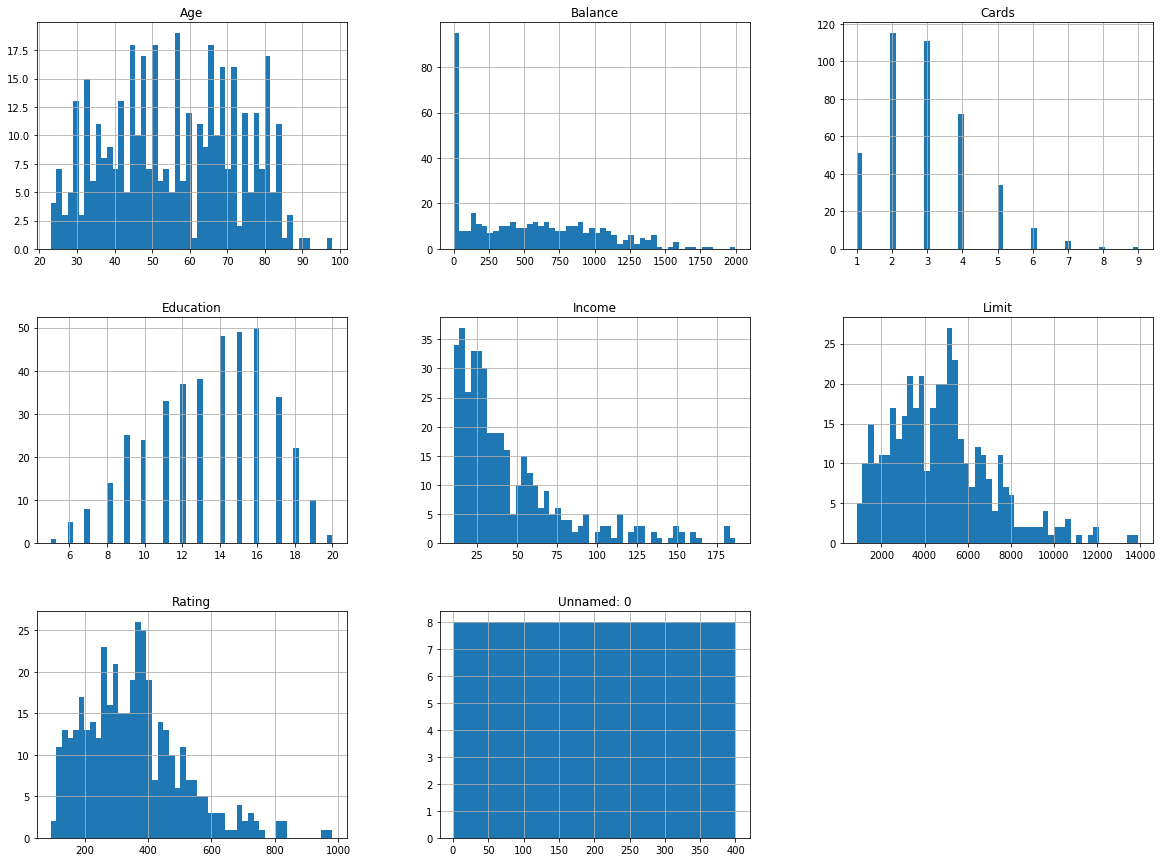

In [10]:
# Looks like most of the data is not normally distributed (age is somewhat normally distributed)
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(bins=50, figsize=(20,15))
plt.show()

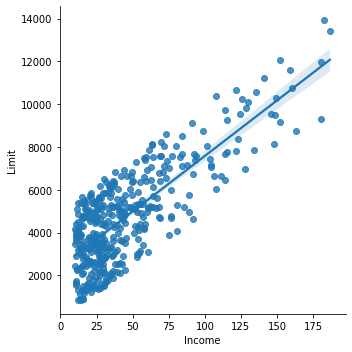

In [11]:
plt_income = sns.lmplot(x='Income', y='Limit', data=df)
# Slope is probably +50/60 so positively correlated
# Intercept probably around 2000

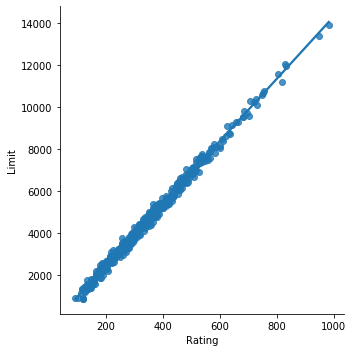

In [12]:
plt_rating = sns.lmplot(x='Rating', y='Limit', data=df)
# Slope is near 15
# Intercept is near 0

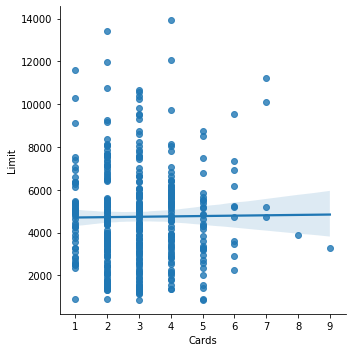

In [13]:
plt_cards = sns.lmplot(x='Cards', y='Limit', data=df)
# Slope is near 0
# Intercept is 4500

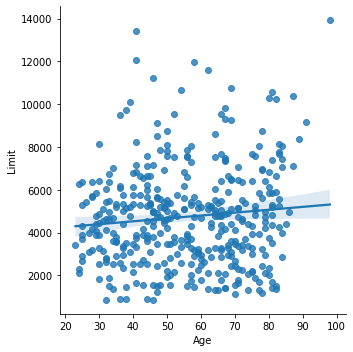

In [14]:
plt_age = sns.lmplot(x='Age', y='Limit', data=df)
# Slope is slightly positive, near 1
# Intercept is just 

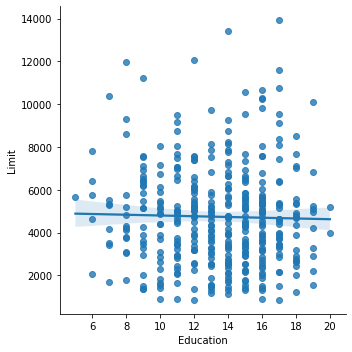

In [15]:
plt_education = sns.lmplot(x='Education', y='Limit', data=df)

From the above plots it looks like Income and Rating are both great predictors and the other three are not good at all.  Let's verify with linear regression.

In [16]:
corr_matrix = df.corr()
corr_matrix['Income'].sort_values(ascending=False)

Income        1.000000
Limit         0.792088
Rating        0.791378
Balance       0.463656
Age           0.175338
Unnamed: 0    0.037203
Cards        -0.018273
Education    -0.027692
Name: Income, dtype: float64

Looking at the correlation coefficients we can see that indeed income and rating are good predictors with R^2 near .80 and the others (aside from balance) are not good predictors.